# I-HANK model

Variables\
A_hh: Houshold assets deflated with PNT \
A: Houshold assets nominal\
E_hh: Houshold expenditure deflated with PNT \
E: Nominal Houshold expenditure

Parameters follow notation from I-HANK docunemtation.\
New parameters are followed by _



In [ ]:
%load_ext autoreload
%autoreload 2


import numpy as np

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from IHANKModel import IHANKModelClass
import func 

In [ ]:
model = IHANKModelClass(name='baseline')
model.find_ss(do_print=True)
func.plot_policy(model, ['a', 'e', 'ct', 'cnt', 'cth', 'ctf'])

In [ ]:
# Expenditure on tradable and non-tradable goods as a function of total expenditure
a_ = model.ss.a[0,3,:]*model.ss.PNT
e_ = model.ss.e[0,3,:]*model.ss.PNT
ect_ = model.ss.ct[0,3,:]*model.ss.PT
ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
share_ = ect_/(ecnt_+ect_)

plt.figure()
plt.plot(e_,share_)
plt.xlabel('Total expenditure')
plt.ylabel('Expenditure share tradable goods')
plt.title('Non-homothetic expenditure shares')

In [ ]:
model.test_hh_path()

In [ ]:
model.test_ss()

In [ ]:
model.test_path()



In [ ]:
model.compute_jacs()

In [ ]:
model.test_jacs()

In [ ]:
float = model.copy()

float.par.jump_PF_s = +0.03 # initial jump
float.par.rho_PF_s = 0.80 # AR(1) coefficeint

float.find_transition_path(shocks=['PF_s'],do_print=False,do_end_check=False)

In [ ]:
lvl_path = ['Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s']
paths = ['PTH_s', 'PF_s', 'E', 'PF', 'GDP', 'CT', 'CNT','CTH_s', 'i', 'ra', 'iF_s']


float.show_IRFs(varnames=paths, lvl_value= lvl_path, do_shocks=False, do_targets=False, ncols=3, T_max=50)

# No affect of a forigne price shock - ploting UIP 

The exchange rate is given by the inverse of the forigne price level.\
No change in the price of forign goods in domestic currency.


In [ ]:
# Showing nothing happens to the domestic i
path = float.path

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)


ax1.plot((1+path.E[1,:])/(1+path.E[0,:]), label= 'RHS= (1+E_t)/(1+E_{t-1})')
ax1.plot( 1+ path.i, label = 'LHS = 1+i_t')

ax1.legend()
ax1.set_title('Interest rate parity')

# Nominal exchange rate E absorbing the whole shock is consistent with no change in prices,
# therefor no change in i and no change in 

ax2 = fig.add_subplot(1,2,2)
ax2.plot(path.E[0:50], label= 'E')
ax2.plot((path.PF_s[:50])**(-1), label = 'PF_s', linestyle='--')
ax2.legend()


# Shock with a forign taylor rule

### Manual AR 1 shock 

In [ ]:
# More manual AR(1) shock 
T_max = model.par.T//2 
dPF_s = np.zeros(model.par.T)


scale = 0.03
rho = 0.8
for t in range(T_max):
    dPF_s[t] = scale*rho**t

model_check = model.copy()
shocks = {'dPF_s': dPF_s}
model_check.find_transition_path(shocks=shocks)

model_check.compare_IRFs([model_check,float ], ['check', 'OG'], ['PF_s'], T_max=50, do_shocks=True, do_targets=False, ncols=3)


### Taylor rule 

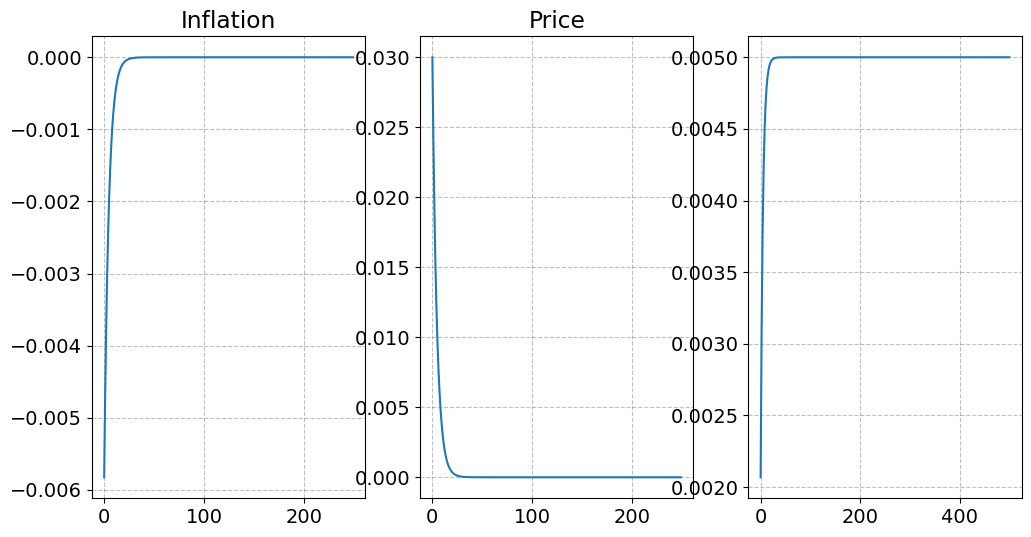

In [42]:

# Shock max 
T_max = model.par.T//2 

# Price shock 
dPF_s = np.zeros(model.par.T)
pi_plus = np.zeros(model.par.T)
iF_s = np.zeros(model.par.T)
drF = np.zeros(model.par.T)
rF = np.zeros(model.par.T)
scale = 0.03
rho = 0.8

for t in range(T_max):
    dPF_s[t] = scale*rho**t

# Prices
PF_calc = dPF_s + 1

iF_s[:] = model.ss.i
rF[:]  = model.ss.rF
# Inflation 
for t in range(model.par.T-1):
    pi_plus[t] = PF_calc[t+1]/ PF_calc[t] -1

    iF_s[t] = (1+model.ss.i) * ((1+pi_plus[t])/(1+model.ss.pi))**model.par.phi -1
    
    rF[t] = (iF_s[t] + 1)/(1+pi_plus[t])-1

    drF[t] = model.ss.rF - rF[t]



fig = plt.figure(figsize=(12,6))

ax0 = fig.add_subplot(1,3,1)
ax0.plot(pi_plus[:T_max], label='$\pi_{t+1}$')
ax0.set_title('Inflation')

ax1 = fig.add_subplot(1,3,2)
ax1.plot(dPF_s[:T_max], label='$Price$')
ax1.set_title('Price')

ax2 = fig.add_subplot(1,3,3)
ax2.plot(rF)



In [43]:
model_check = model.copy()
shocks = {'dPF_s': dPF_s, 'drF':drF}
model_check.find_transition_path(shocks=shocks)

### shocks ###


/Users/emmagundersen/GEModelTools/GEModelTools/figures.py:107: RuntimeWarning: invalid value encountered in divide
  ax.plot(np.arange(T_max),100*(pathvalue[:T_max]/ssvalue-1),label=label)


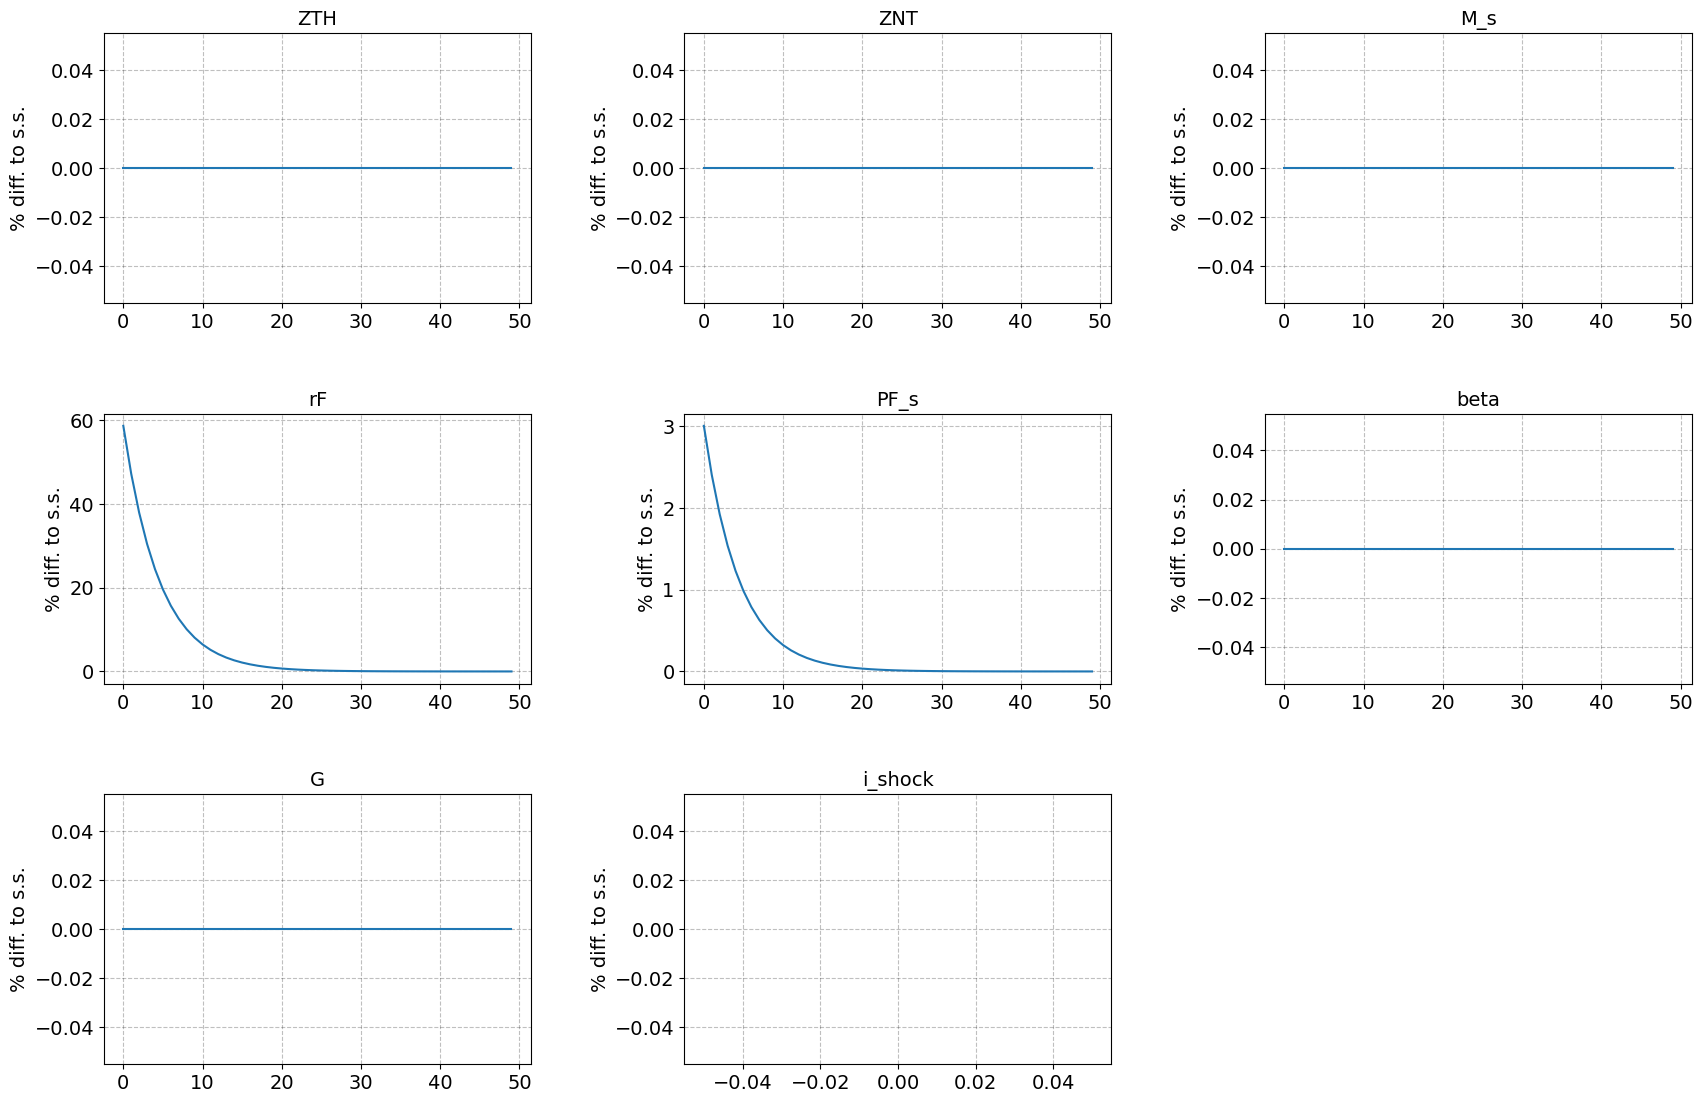


### varnames ###


/Users/emmagundersen/GEModelTools/GEModelTools/figures.py:107: RuntimeWarning: divide by zero encountered in divide
  ax.plot(np.arange(T_max),100*(pathvalue[:T_max]/ssvalue-1),label=label)


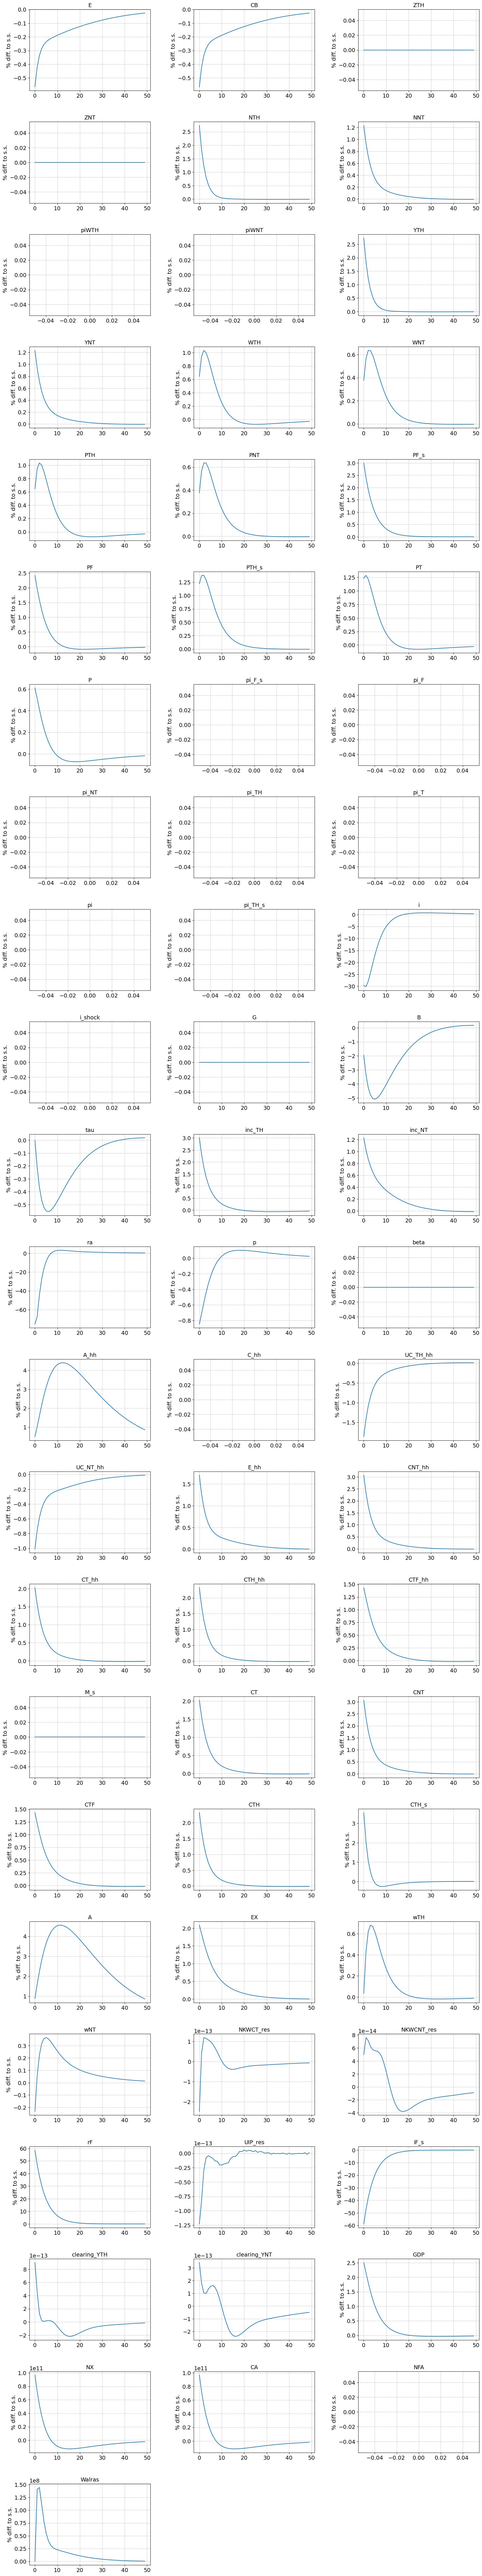


### tagets ###


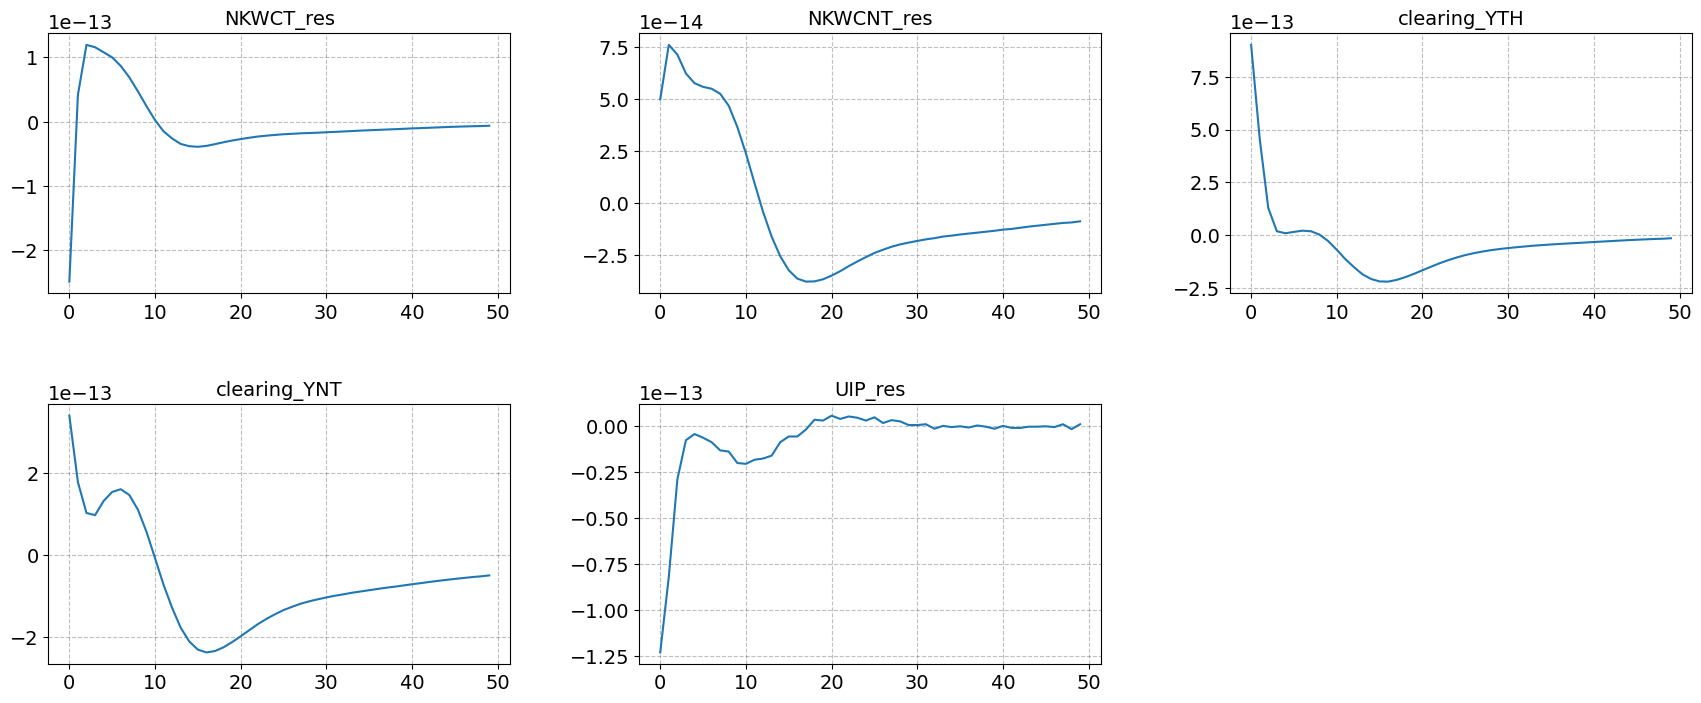

In [45]:
model_check.show_IRFs(varnames=model.varlist, T_max=50, ncols=3)

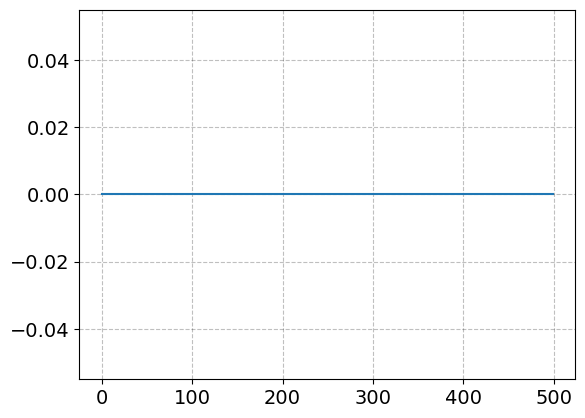

In [18]:
# More manual AR(1) shock 
T_max = model.par.T//2 

# Price shock 
dPF_s = np.zeros(model.par.T)
scale = 0.03
rho = 0.8
for t in range(T_max):
    dPF_s[t] = scale*rho**t

# Prices
PF_calc = dPF_s + 1

# Inflation 
# pi = inflation_from_price(PF_calc,model.ini.PF_s)


model_check = model.copy()
shocks = {'dPF_s': dPF_s}
model_check.find_transition_path(shocks=shocks)

# plt.plot(model_check.path.PF_s[:10])
# plt.plot(PF_calc[:10], linestyle= '--')
plt.plot(pi)

# model_check.compare_IRFs([model_check,float ], ['check', 'OG'], ['PF_s'], T_max=50, do_shocks=True, do_targets=False, ncols=3)


### Prices from inflation shock 

In [ ]:
def price_from_inflation(P,pi,T,iniP):

    for t in range(T):
        if t == 0:
            P[t] = iniP*(1+pi[t]) 
        else:
            P[t] = P[t-1]*(1+pi[t]) 
   

In [ ]:
# More manual AR(1) shock 
T_max = model.par.T
dPF_s = np.zeros(model.par.T)
PF_s_new = np.zeros(model.par.T)
pi_plus = np.zeros(model.par.T)

scale = 0.03
rho = 0.8
for t in range(T_max):
    pi_plus[t] = scale*rho**t


price_from_inflation(PF_s_new,pi_plus,T_max,model.ss.PF_s)
dPF_s = PF_s_new - model.ss.PF_s 


fig = plt.figure(figsize=(12,6))

ax0 = fig.add_subplot(1,2,1)
ax0.plot(pi_plus[:T_max], label='$\pi_{t+1}$')
ax0.set_title('Inflation')

ax1 = fig.add_subplot(1,2,2)
ax1.plot(dPF_s[:T_max], label='$Price$')
ax1.set_title('Price')


In [ ]:
shocks = {'dPF_s': dPF_s}
model_check = model.copy()
model_check.find_transition_path(shocks=shocks)
model_check.show_IRFs(varnames=paths, lvl_value= lvl_path, do_shocks=False, do_targets=False, ncols=3, T_max=50)


In [ ]:
# Not Done! ***
T_max = 11
dPF_s = np.zeros(model.par.T)
PF_s_tjek = np.zeros(model.par.T)

# Make a concave path for PF_s with max at t=5 with a value of 0.1
for t in range(0, 10):
    dPF_s[t] = 0.06*np.exp(-0.5*(t-5)**2)

    # Check
    PF_s = model.ss.PF_s *(1+ dPF_s[t])


    # taylor rule 



PF_s_tjek[10:] = model.ss.PF_s


shocks = {'dPF_s': dPF_s}

float.find_transition_path(shocks=shocks)
# float.show_IRFs(varnames=paths, lvl_value= lvl_path, do_shocks=False)


fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(float.path.PF_s[0:T_max], label= 'PF_s')
ax1.plot(PF_s_tjek[0:T_max], label = 'PF_s_tjek', linestyle='--')
ax1.legend()



# Fixed exchange rate

In [ ]:
fixed = model.copy()
fixed.par.float = False
fixed.find_ss()

In [ ]:
fixed.test_ss()

In [ ]:
fixed.test_path()

In [ ]:
fixed.compute_jacs()

In [ ]:
fixed.test_jacs()

In [ ]:
fixed.par.jump_PF_s = -0.03 # initial jump
fixed.par.rho_PF_s = 0.80 # AR(1) coefficeint

fixed.find_transition_path(shocks=['PF_s'],do_print=False,do_end_check=False)

# Fixed exchange rate inflation shock

In [ ]:
# More manual AR(1) shock 
T_max = model.par.T
dPF_s = np.zeros(model.par.T)
PF_s_new = np.zeros(model.par.T)
pi_plus = np.zeros(model.par.T)

scale = 0.03
rho = 0.8
for t in range(T_max):
    pi_plus[t] = scale*rho**t


price_from_inflation(PF_s_new,pi_plus,T_max,model.ss.PF_s)

dPF_s = PF_s_new - model.ss.PF_s 

plt.plot(dPF_s)

shocks = {'dPF_s': dPF_s}
fixed.find_transition_path(shocks=shocks,do_print=False)

In [ ]:
lvl_path = ['Walras', 'CB', 'i']
path = ['i', 'E', ]
path_hh = ['CNT_hh', 'CT_hh', 'CTF_hh']

fixed.show_IRFs(varnames=model.varlist, lvl_value= lvl_path)

In [ ]:
['E',
 'NTH',
 'NNT',
 'YTH',
 'YNT',
 'WTH',
 'WNT',
 'PTH',
 'PNT',
 'PF_s',
 'PF',
 'PTH_s',
 'PT',
 'P'
 'i',
 'i_shock',
 'G',
 'B',
 'tau',
 'inc_TH',
 'inc_NT',
 'ra',
 'p',
 'beta',
 'A_hh',
 'C_hh',
 'UC_TH_hh',
 'UC_NT_hh',
 'E_hh',
 'CNT_hh',
 'CT_hh',
 'CTH_hh',
 'CTF_hh',
 'M_s',
 'CT',
 'CNT',
 'CTF',
 'CTH',
 'CTH_s',
 'A',
 'EX',
 'wTH',
 'wNT',
 'rF',
 'iF_s',
 'GDP',
 'NX',
 'CA',
 'NFA']

In [ ]:
hh_var = ['ra','inc_TH', 'inc_NT', 'p']
models = {'fixed': fixed}

inputs_list = [['ra'], ['p'], ['inc_TH', 'inc_NT' ], 'all']

model_titles = {
    'fixed': 'Price shock, fixed E'
}

for model_name, model in models.items():

    T_max = 50

    fig, (ax_C_NT, ax_C_TH) = plt.subplots(1, 2, figsize=(16, 4), dpi=100)
    fig.suptitle(f'{model_titles[model_name]}', fontsize=16)

    ax_C_NT.set_title('Consumption non-tradeable sector HH, $C_{NT}^{hh}$', fontsize=12)
    ax_C_TH.set_title('Consumption tradeable sector HH, $C_{TH}^{hh}$', fontsize=12)

    i_color = 0

    # for use_inputs in [[x] for x in model.inputs_hh]:
    for use_inputs in inputs_list:

        # a. compute
        path_alt = model.decompose_hh_path(do_print=False, use_inputs=use_inputs)

        # b. plot
        if use_inputs is None:
            label = 'No inputs'
            ls = '--'
            color = 'black'
        elif use_inputs == 'all':
            label = 'All inputs'
            ls = '-'
            color = 'black'
        else:
            label = f'Only effect from {use_inputs[0]}'
            ls = '-'
            color = f'C{i_color}' # use color index directly
            i_color += 1

        ax_C_NT.plot((path_alt.CT_hh[:T_max] / model.ss.CT_hh - 1) * 100, ls=ls, color=color, label=label)
        ax_C_TH.plot((path_alt.CNT_hh[:T_max] / model.ss.CNT_hh - 1) * 100, ls=ls, color=color, label=label)

    for ax in [ax_C_NT, ax_C_TH]:
        ax.set_ylabel('% diff to s.s.')
        lgd = ax_C_TH.legend(frameon=True, ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
